<a href="https://colab.research.google.com/github/mikailachmad/Pengolahan-Citra-Digital/blob/main/PCD_Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time, sys, os

def warna(teks, kode):
    return f"\033[{kode}m{teks}\033[0m"

def ketik(teks, delay=0.05):
    for huruf in teks:
        sys.stdout.write(huruf)
        sys.stdout.flush()
        time.sleep(delay)
    print()

os.system("cls" if os.name == "nt" else "clear")

judul = """
=========================================
     PENGOLAHAN CITRA DIGITAL
=========================================
"""

print(warna(judul, "90"))

ketik(warna("Nama Lengkap : ", "91") + "Mikail Achmad")
ketik(warna("NIM          : ", "92") + "24/542370/PA/23026")
ketik(warna("Kelas        : ", "93") + "KOM")

print("\n" + "-"*50 + "\n")

ketik(warna("Tugas: The 2st Assignment", "94"), delay=0.05)

menu = "Implementation for image enhancement in any image types (blurred image, dark image, bright image, low-contrast image.)"

print(menu)


     PENGOLAHAN CITRA DIGITAL

Nama Lengkap : Mikail Achmad
NIM          : 24/542370/PA/23026
Kelas        : KOM

--------------------------------------------------

Tugas: The 2st Assignment
Implementation for image enhancement in any image types (blurred image, dark image, bright image, low-contrast image.)


# 1. Set up to be Processed Images

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab.patches import cv2_imshow

In [4]:
image_1 = "/content/blurred image.jpg"
read_image_1 = cv2.imread(image_1)
image_1 = cv2.cvtColor(read_image_1, cv2.COLOR_BGR2RGB)

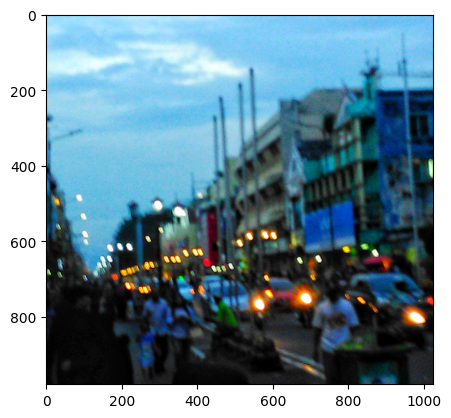

In [5]:
def show(image_1):
  plt.imshow(image_1)
show(image_1)

> Memuat sebuah Gambar Pemandangan Jalan Blur yang diambil dari Website Staticflickr.

> Citra yang digunakan untuk Image Enhancement in Blurred Image.

> Sumber: https://live.staticflickr.com/3843/33389314560_5c19e10214_b.jpg

In [6]:
image_2 = "/content/dark image.jpg"
read_image_2 = cv2.imread(image_2)
image_2 = cv2.cvtColor(read_image_2, cv2.COLOR_BGR2RGB)

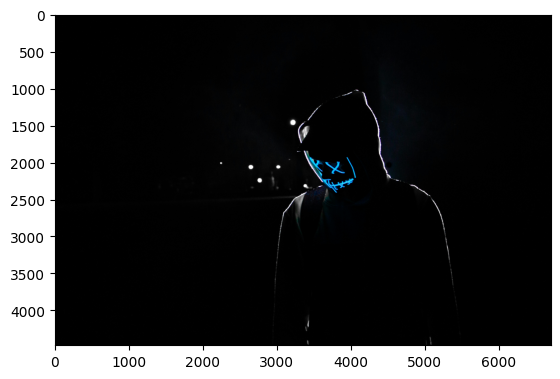

In [7]:
def show(image_2):
  plt.imshow(image_2)
show(image_2)

> Memuat sebuah Gambar Pemandangan Jalan Blur yang diambil dari Website image pexels.

> Citra yang digunakan untuk Image Enhancement in Blurred Image.

> Sumber: https://images.pexels.com/photos/1480690/pexels-photo-1480690.jpeg



In [8]:
image_3 = "/content/bright_image.jpg"
read_image_3 = cv2.imread(image_3)
image_3 = cv2.cvtColor(read_image_3, cv2.COLOR_BGR2RGB)

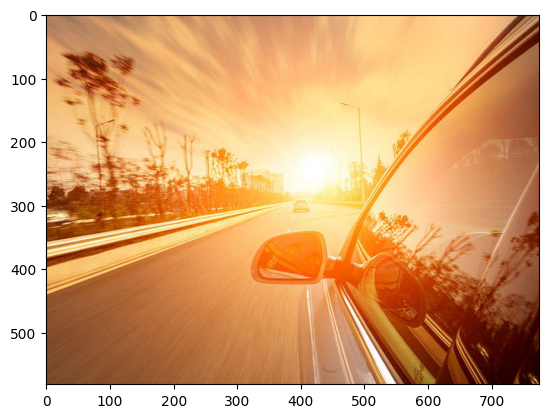

In [9]:
def show(image_3):
  plt.imshow(image_3)
show(image_3)

> Memuat sebuah Gambar Jalanan yang terlalu silau yang diambil dari Website Honda.

> Citra yang digunakan untuk Image Enhancement in Bright Image.

> Sumber: https://www.hondajember.com/berita/detil/56

In [10]:
image_4 = "/content/low contrast image.jpg"
read_image_4 = cv2.imread(image_4)
image_4 = cv2.cvtColor(read_image_4, cv2.COLOR_BGR2RGB)

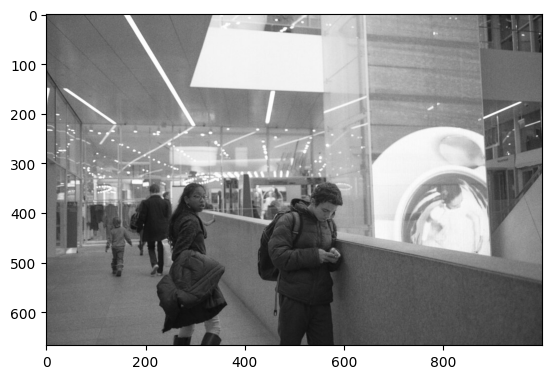

In [11]:
def show(image_4):
  plt.imshow(image_4)
show(image_4)

> Memuat sebuah Gambar Mall yang Berkontras Rendah yang diambil dari Website Thephoblografer.

> Citra yang digunakan untuk Image Enhancement in Low-Contrast Image.

> Sumber: https://www.thephoblographer.com/2018/03/06/high-contrast-vs-low-contrast-black-and-white-photo-editing-whats-the-difference/

In [12]:
image_5 = "/content/noisy image.png"
read_image_5 = cv2.imread(image_5)
image_5 = cv2.cvtColor(read_image_5, cv2.COLOR_BGR2RGB)

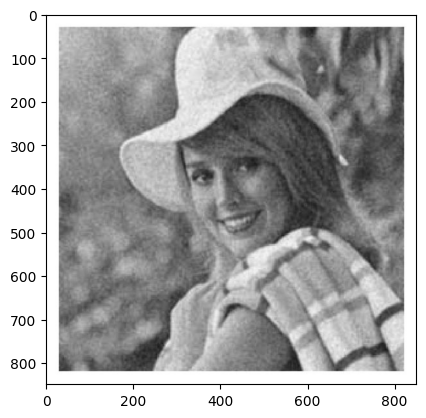

In [13]:
def show(image_5):
  plt.imshow(image_5)
show(image_5)

> Memuat sebuah Gambar Perempuan yang Bernoice yang diambil dari Website ResearchGate.

> Citra yang digunakan untuk Image Enhancement in Noisy Image.

> Sumber: https://www.researchgate.net/figure/Detail-of-restoring-noisy-Elaine-image-512-512-with-different-filters-a-Original_fig1_258382693

# II. Image Enhancement

# In Blurred Image

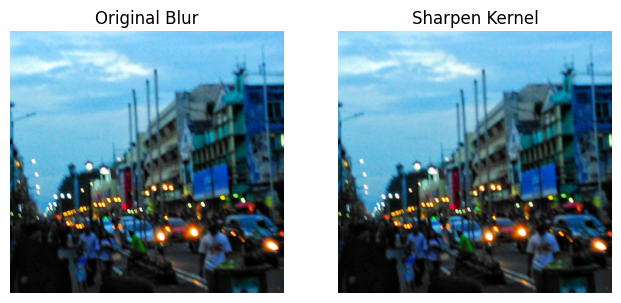

In [14]:
sharpen_kernel = np.array([[0.11, 0.11, 0.11],
                           [0.11, 0.11, 0.11],
                           [0.11, 0.11, 0.11]])
sharpened = cv2.filter2D(image_1, -1, sharpen_kernel)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(image_1, cmap='gray'); plt.title('Original Blur'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(sharpened, cmap='gray'); plt.title('Sharpen Kernel'); plt.axis('off')
plt.show()


> Analisis Metode Sharpening Kernel untuk Blurred Image

Implementasi sharpening pada gambar diatas berhasil meningkatkan ketajaman detail, terutama pada bagian objek seperti gedung dan pepohonan. Kelebihan utamanya adalah kemampuannya untuk memperjelas batas-batas objek yang sebelumnya kabur, sehingga membuat gambar menjadi lebih informatif secara visual. Namun, kekurangannya adalah proses ini juga ikut menajamkan noise yang sudah ada pada citra, membuatnya terlihat sedikit kasar atau berbintik. Solusi untuk mengatasi hal ini adalah dengan menerapkan denoising filter seperti median filter atau gaussian filter dengan intensitas rendah sebelum melakukan proses penajaman.

# In Dark Image

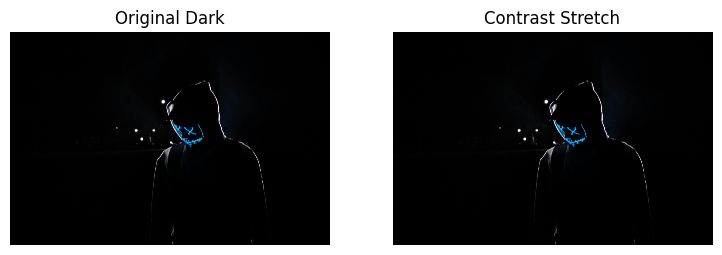

In [15]:
min_val, max_val = image_2.min(), image_2.max()
stretch = ((image_2 - min_val) / (max_val - min_val) * 255).astype('uint8')

plt.figure(figsize=(14,4))
plt.subplot(1,3,1); plt.imshow(image_2, cmap='gray'); plt.title('Original Dark'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(stretch, cmap='gray'); plt.title('Contrast Stretch'); plt.axis('off')
plt.show()

> Analisis Metode Contrast Stretching untuk Dark Image

Teknik Contrast Stretching mengangkat tingkat kecerahan, sehingga objek yang tadinya tidak terlihat menjadi tampak jelas. Kelebihannya adalah metode ini mampu mengungkap detail yang tersembunyi di area bayangan (shadow) tanpa memerlukan intervensi manual yang rumit. Kekurangannya, metode pencerahan global seperti ini sering kali membuat area yang sudah cukup terang menjadi terlalu putih (overexposed atau washed out), sehingga kehilangan detail di area tersebut. Solusi yang lebih baik adalah menggunakan metode pencerahan adaptif seperti Contrast Limited Adaptive Histogram Equalization (CLAHE) yang memproses gambar per bagian kecil, sehingga pencerahan lebih merata dan tidak merusak area yang sudah terang.

# In Bright Image

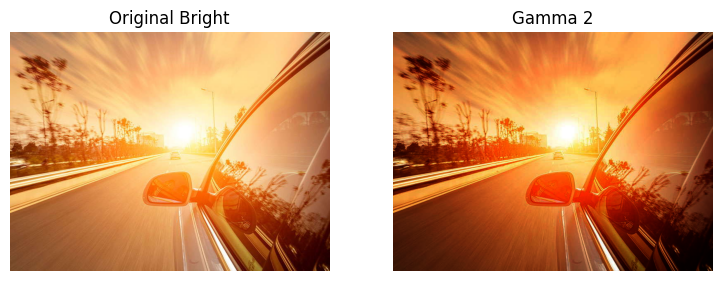

In [16]:
gamma_bright = 2
gamma_bright_2 = ((image_3 / 255.0) ** gamma_bright * 255).astype('uint8')

plt.figure(figsize=(14,4))
plt.subplot(1,3,1); plt.imshow(image_3, cmap='gray'); plt.title('Original Bright'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(gamma_bright_2, cmap='gray'); plt.title(f'Gamma {gamma_bright}'); plt.axis('off')
plt.show()

> Analisis Metode Gamma Correction untuk Bright Image

Proses Koreksi Gamma berhasil menurunkan tingkat kecerahan, mengembalikan warna dan detail yang sebelumnya pudar karena paparan cahaya berlebih. Kelebihan proses ini adalah kemampuannya untuk menyelamatkan detail pada area highlight yang hampir hilang, membuat tekstur dan warna objek menjadi lebih kaya. Namun, kekurangannya adalah penurunan kecerahan secara merata dapat menyebabkan area yang tadinya memiliki pencahayaan normal menjadi underexposed. Solusi untuk menyeimbangkan hasilnya adalah dengan menggunakan teknik curves adjustment yang memungkinkan kontrol lebih presisi terhadap rentang tonal yang berbeda, sehingga hanya area highlight yang dikoreksi secara signifikan.

# In Low-Contrast Image

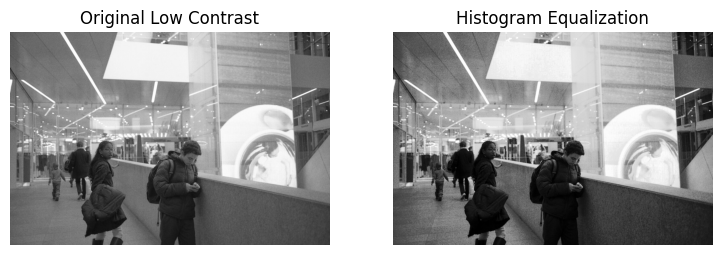

In [17]:
gray_image_4 = cv2.cvtColor(image_4, cv2.COLOR_RGB2GRAY)
equalized = cv2.equalizeHist(gray_image_4)

plt.figure(figsize=(14,4))
plt.subplot(1,3,1); plt.imshow(image_4, cmap='gray'); plt.title('Original Low Contrast'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(equalized, cmap='gray'); plt.title('Histogram Equalization'); plt.axis('off')
plt.show()

> Analisis Metode Histogram Equalization untuk Low-Contrast Image

Hasil Histogram Equalization memperluas rentang dinamis piksel, membuat perbedaan antara area gelap dan terang menjadi lebih jelas. Kelebihan adalah kemampuannya untuk mengungkap detail dan tekstur yang sebelumnya tersembunyi. Namun, kekurangan yang terlihat dari metode global ini adalah kecenderungannya untuk memperkuat noise yang ada di dalam citra, serta terkadang dapat menghilangkan gradasi halus pada area tertentu karena peregangan histogram yang terlalu agresif. Solusi yang lebih baik untuk mengatasi hal ini adalah dengan menerapkan Contrast Limited Adaptive Histogram Equalization (CLAHE), sebuah metode yang meningkatkan kontras secara lokal pada bagian-bagian kecil dari citra.

# In Noisy Image

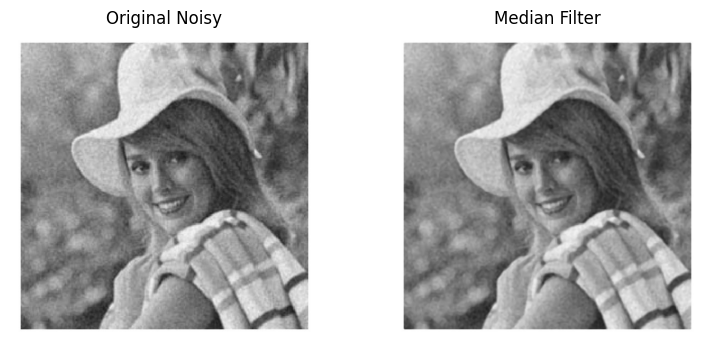

In [18]:
median_filtered = cv2.medianBlur(image_5, 5)

plt.figure(figsize=(14,4))
plt.subplot(1,3,1); plt.imshow(image_5, cmap='gray'); plt.title('Original Noisy'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(median_filtered, cmap='gray'); plt.title('Median Filter'); plt.axis('off')
plt.show()

> Analisis Metode Median Filter untuk Noisy Image

Pada citra yang mengandung noise, penerapan ini berhasil menghaluskan bintik-bintik, menghasilkan gambar yang lebih bersih dan mulus. Kelebihan dari proses ini adalah kemampuannya untuk meningkatkan kualitas persepsi visual secara signifikan, membuat objek utama lebih mudah untuk dilihat. Namun, kekurangan yang paling umum adalah proses penghalusan ini sering kali mengorbankan detail halus dan ketajaman pada gambar, membuatnya terlihat sedikit buram. Untuk mengatasi ini, dapat digunakan filter yang lebih canggih seperti non-local means atau bilateral filter, yang mampu membedakan antara noise dan detail gambar asli sehingga dapat meredam derau sambil tetap mempertahankan ketajaman tepi objek.